# Pima Indians Diabetes Database

## Sources:
- Original owners: `National Institute of Diabetes and Digestive and Kidney Diseases`
- Donor of database: `Research Center, RMI Group Leader Applied Physics Laboratory, The Johns Hopkins University`
- Number of Instances: 768
- Number of Attributes: 8 plus class
- For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
- Missing Attribute Values: Yes
- Class Distribution:
  * **Positive Tested** Class value = 1
  * **Negative Tested** Class value = 0
- Class Value  Number of instances
  * Class 0: 500
  * Class 1: 268

## Import neccessary libraries


In [55]:
from numpy import loadtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

## Prepare data for training

In [56]:
# download diabetes datasest and its description
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names"

--2023-09-24 15:12:44--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv.6’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2023-09-24 15:12:45 (16.6 MB/s) - ‘pima-indians-diabetes.data.csv.6’ saved [23278/23278]

--2023-09-24 15:12:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

## TODO 1: Split dataset into Input (X) and Output (y)

**Score: 1%**

**Input Variables (X):**
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

**Output Variables (y):**
9. Class variable (0 or 1)

**Guideline:**

You can split the array into two arrays by selecting subsets of columns
using the standard NumPy slice operator or “:”.

Remember, in NumPy, the first column always started at 0

**Instruction:**

Split data into input (`X`) and output (`y`) variables, respectively. Repleace `None` to a number.

In [57]:
# load the dataset
dataset = loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')
X = dataset[:, 0:8]
y = dataset[:, 8]

## TODO 2: Training and Testing

**Score: 1%**

**Instruction:**

Fill out `None` to split dataset into 80% and 20% for training and testing datasets, respectively.



In [58]:
train = 0.8
train_b = int(np.rint(X.shape[0] * train))

X_train = X[:train_b, :]
y_train = y[:train_b]
X_test  = X[train_b:, :]
y_test  = y[train_b:]

## TODO 3: Build a model

**Score: 1%**

**Instruction:** Create a neural network model by adding each layer:
- The model expects rows of data with 8 variables
- The first hidden layer has 12 nodes and uses the `relu` activation function.
- The second hidden layer has 8 nodes and uses the `relu` activation function.
- The output layer has one node and uses the `sigmoid` activation function.

In [59]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## TODO 4: Compile a model

**Score: 1%**

**Instruction:** Specify loss function and optimizer
- Use cross entropy as the loss argument for a binary classification problems
- Define an optimizer as the efficient stochastic gradient descent algorithm

In [60]:
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

## TODO 5: Train a model

**Score: 1%**

**Instruction:** This problem will run for a small number of epochs (150) and use a relatively small batch size of 10

In [61]:
# fit the keras model on the dataset
hist = model.fit(
    X, y,
    epochs=150,
    batch_size=10,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/150
77/77 [==============================] - 1s 4ms/step - loss: 2.0465 - accuracy: 0.6315 - val_loss: 0.6661 - val_accuracy: 0.6429
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6693 - val_loss: 0.6572 - val_accuracy: 0.6234
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6589 - val_loss: 0.6526 - val_accuracy: 0.6558
Epoch 4/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6667 - val_loss: 0.6414 - val_accuracy: 0.6623
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6654 - val_loss: 0.6406 - val_accuracy: 0.6494
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6576 - val_loss: 0.6358 - val_accuracy: 0.6429
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6654 - val_loss: 0.6328 - val_accuracy: 0.6429
Epoch 8/150
7

## Evaluation

At this stage, if your code works correctly, you should get accuracy of 76%.

**Question:** Do you think this model is efficient? Why don't you just investigate deeper?

Accuracy:  0.7142857313156128


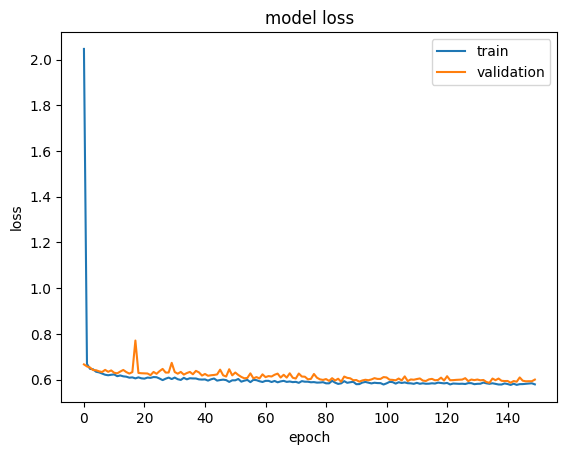

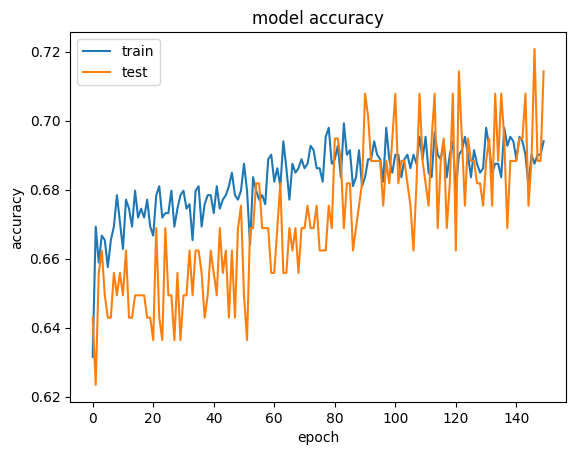

In [62]:
_, score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [63]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 [==============================] - 0s 1ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] 	=> 0 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] 	=> 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] 	=> 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] 	=> 0 (expected 1)
